![uspn.png](uspn.png)
# <font color='blue'> <center> Projet de Visualisation des données  </font> </center>
## <font color='blue'> <center> <u> Classement thématique des sujets de journaux télévisés (janvier 2005 - septembre 2020) </font> </center>

### Aghiles SI ALI 11806989
### Ivan KRIVOKUCA 11807642
### Zicheng FANG 11927403
### Lazar ANDJELOVIC 11807937
    


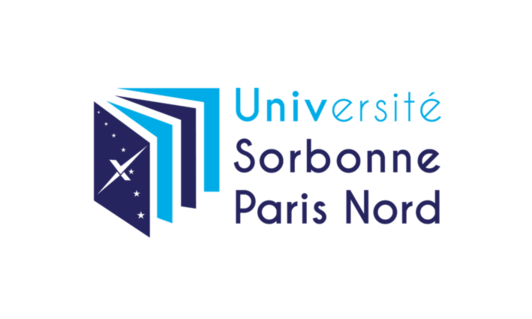

# Mise en contexte
Aujourd'hui, [selon une étude](https://tvmag.lefigaro.fr/le-scan-tele/actu-tele/2016/03/26/28001-20160326ARTFIG00051-80-des-francais-s-informent-grace-aux-jt-52-grace-aux-chaines-d-info-en-continu.php) près de 90% des Français suivent l'actualité au moins une fois par jour et 80% des français s'informent via les journaux télévisés (JT) présents sur les grandes chaînes emblématiques (TF1, France 2 ...)

Nous connaissons forcement quelqu'un dans notre entourage qui a forcement dit une fois cette phrase :  
> « De façon dans le JT de 20h ils parlent toujours de la même chose ! »

[Avec une confiance des Français en baisse vers les "medias traditionnelles"](https://www.publicsenat.fr/article/politique/barometre-la-croix-faible-interet-pour-l-actualite-et-mefiance-envers-les-medias), on peut soulever quelques interrogations.

Est-ce que on peut faire dire que les JT des chaînes de télévisions françaises se diversifient dans leur revue de l'actualité ? 

Est-ce que d'importants événements peuvent chambouler l'envers du paysage médiatique ?

Est-ce qu'une chaîne se distingue par ce qu'elle difuse ?

Pour répondre a ces nombreuses interrogation nous nous sommes doté de plusieurs jeu de données.



### Import des modules nécesaire au bon déroulement des présentations
<font color='red'> Il faut au préalable avoir **plotly, ipywidgets, bar_chart_race** comme modules installés pour pouvoir aller au bout de la présentation </font>

Installation classique (sous Linux)

```
pip install plotly ipywidgets bar_chart_race
``` 

Installation via Anaconda, dans le terminal fourni
 
```
conda install -c conda-forge

conda install -c conda-forge bar_chart_race

conda install -c plotly plotly
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
#pour pouvoir intéragir avec le graphique
from ipywidgets import interact
#Graphique interactif
import plotly.express as px
#Créer la video bar_chart_race
import bar_chart_race as bcr
#Permet d'ouvrir la vidéo
from IPython.display import Video

## <font color='green'> <center> <b> Partie I : Les données à-propos du classement des thématiques </font> </center> </b>

> Les données représentent un classement thématique des sujets diffusés sur les journaux télévisés du soir de six chaînes (TF1, France 2, France 3, Canal +, Arte, M6) pour la période janvier 2005 à septembre 2020.  
<cite>[D'après le site data.gouv.fr](https://www.data.gouv.fr/fr/datasets/classement-thematique-des-sujets-de-journaux-televises-janvier-2005-septembre-2020/#resources)</cite>


Nous avons aussi ajouter les données présentes de [janvier 2021 à mars 2021](http://www.inatheque.fr/medias/inatheque_fr/publications_evenements/barometre_thematique_donnees/BT_trimestre_1_2021_mensuel.pdf) qui n'étaient pas présentes dans le jeu de données de base. 

Tout d'abord voyons de quoi sont composés les données fournit.

In [2]:
# pour charger un fichier csv 
df = pd.read_csv('ina-barometre-jt-tv-donnees-mensuelles-2005-2020-nombre-de-sujets.csv', sep = ';', encoding='latin-1')

#Pour éviter d'avoir des chiffres à virgules
df["Arte"] = df["Arte"].values.astype(int)


#Variable pour les futurs visulisation
sujet = ['Catastrophes','Culture-loisirs', 'Economie', 'Education', 'Environnement', 'Faits divers','Histoire-hommages','International', 
         'Justice', 'Politique France', 'Santé', 'Sciences et techniques','Société','Sport'] 
couleur = ['yellowgreen', 'darkorange', 'lightskyblue', 'orangered', 'royalblue','violet', 'cadetblue', 'lightpink', 'forestgreen', 'teal', 'brown' ,'dimgray', 
         'moccasin', 'mediumpurple']

df.head() 

,MOIS,THEMATIQUES,TF1,France 2,France 3,Canal +,Arte,M6,Totaux
0,janv-05,Catastrophes,214,191,88,18,40,49,600
1,janv-05,Culture-loisirs,27,42,35,4,0,23,131
2,janv-05,Economie,35,18,10,1,8,11,83
3,janv-05,Education,14,12,4,3,3,8,44
4,janv-05,Environnement,31,25,15,1,3,10,85


Ainsi les données du fichier "ina-barometre-jt-tv-donnees-mensuelles-2005-2020-nombre-de-sujets.csv" sont composés de :
 - Une colonne **MOIS** qui va de janvier 2005 - septembre 2020 et de janvier 2021 - mars 2021
 - Une colonne **THEMATIQUES** qui est composée des valeurs suivantes: 
 	> 	Catastrophes, Culture-loisirs, Economie, Education, Environnement, Faits divers, Histoire-hommages, International, Justice, Politique France, Santé, Sciences et techniques, Société, Sport.
 
  
 - De six colonnes correspondants aux nombres de thématiques abordés dans **les 6 chaînes nationales** (TF1, France 2, ...)
 - D'une colonne **Totaux** qui est la somme des thématiques abordés par chaque chaîne en fonction du mois. 

Commençons par voir, la répartition des sujets dans un mois donné dans un graphique dans lequel l'utilisateur choisira jusqu'à quelle date il veut afficher

In [3]:
#Variable globale permettant de stocker les valeurs qui seront utilisées plus tard
listetmp = []
liste_mois = []

#Permet d'effacer les variables globales dans le cas où l'utilisateur choisit une date antérieur 
def tableau_propre():
    global liste_mois 
    global listetmp
    #efface les dataframes
    listetmp = np.delete(listetmp,np.arange(0, len(listetmp), 1).tolist())
    liste_mois = np.delete(liste_mois,np.arange(0, len(liste_mois), 1).tolist())

#Ajout l'intervalle de variable dans les listes
# df = la dataframe, i = la position a partir qu'on veut ajouter
def ajout(df,i):
    global liste_mois 
    global listetmp
    #Permet d'ajouter a liste_mois la valeur de df.MOIS.iloc[i]
    liste_mois = np.append (liste_mois, df.MOIS.iloc[i])
    #Il y'a 14 lignes pour changer de mois
    for j in range(i,i+14):
            val = df.Totaux.iloc[j]
            listetmp = np.append (listetmp, val)

#Permet d'afficher le graphe, avec les valeurs choisies par l'utilisateur
# x la date choisit par l'utilisateur   
def graph(x):
    tableau_propre()
    fin = x
    liste2 = []
    i = 0
    while(df.MOIS.iloc[i] != fin):
        ajout(df,i)
        i = i + 14
    if(df.MOIS.iloc[i] == fin):
        ajout(df,i)
    #on split notre liste avec le nombre de mois qu'elle possède pour pouvoir les afficher 
    liste2 = np.array_split(listetmp, len(liste_mois))

    #on créer notre dataframe avec les variables qu'on a fabriqué
    dp = pd.DataFrame(liste2, index=liste_mois, columns=sujet)
    
    #Affichage du graphe avec plotly
    fig = px.line(dp, 
                    labels={
                        "index": "Mois",
                        "value": "Nombre de JT totaux",
                        "variable": "Nom du sujet"
                    },
    )
    
    #Pour éviter d'avoir des flèches qui ne pointe sur rien
    if "mai-17" in liste_mois:
        fig.add_annotation(x="mai-17", y=960,
            text="Élection présidentielle",
            showarrow=True,
            arrowhead=2
        )

    if "juil-18" in liste_mois:
        fig.add_annotation(x="juil-18", y=538,
            text="Coupe du monde de football",
            showarrow=True,
            arrowhead=2
        )

    if "mars-20" in liste_mois:
        fig.add_annotation(x="mars-20", y=2024,
            text="Épidémie COVID",
            showarrow=True,
            arrowhead=2
        )
    
    #Pour éviter d'avoir une répétition de couleur
    fig.data[0].line.color = "yellowgreen"
    fig.data[1].line.color = "moccasin"
    fig.data[2].line.color = "lightpink"
    fig.data[3].line.color = "brown"
    
    fig.update_layout(title_text='Les nombres de sujet en fonction de la thématique', title_x=0.5)
    fig.show()
    #on supprime notre dataframe pour être de n'avoir pas les anciennes valeurs
    del dp

In [4]:
#Permet d'avoir une liste de dates unique qui sera utilisé pour l'interaction avec l'utilisateur
dates = pd.unique(df.MOIS)

def f(x):
    graph(x)
#Permet a l'utilisateur de choisir les dates pour avoir un graphique du début jusqu'a la date choisit.
interact(f, x=dates[1:])

interactive(children=(Dropdown(description='x', options=('févr-05', 'mars-05', 'avr-05', 'mai-05', 'juin-05', …

<function __main__.f(x)>

Sur l’ensemble de nos données (jusqu’à mars-21), les sujets de "Société" semble être prédominants avec ceux de l'international avec quelques gros pics de la politique française lors des périodes électorales (surtout pendant les présidentielles).

Mais dès la crise du COVID, le sujet "Santé" domine tous les autres sujets de télévisons, dès sa surmédiatisation en mars 20 on voit un pic à près de 2000 sujets alors que le deuxième sujet (l'économie) est avec seulement 172 sujets.

Par ailleurs, les pics des thématiques dans les JT sont cohérents avec l’actualité,lors d’un évènement cette thématique domine les autres (voir les flèches).


Néanmoins à l’aide de ce graphique nous ne pouvons pas extraire quel est par exemple le thème le plus abordé. C’est pour cela que nous allons introduire un autre type de visualisation.


In [5]:
#Nouveau jeu de données, les mois sont données en anglais pour pouvoir les convertir en datetime
dp = pd.read_csv('bar_race.csv', sep = ';', encoding='latin-1')
#On convertit chaque mois en datetime
dp['MOIS'] = pd.to_datetime(dp['MOIS'],format="%b-%y")

#On s'intéressera uniquement à la colonne total ici
dp = dp.drop(columns=['TF1', 'France 2', 'France 3', 'Canal +', 'Arte', 'M6'])
#On convertit  les objets de la colonne THEMATIQUES en string
dp.THEMATIQUES = dp.THEMATIQUES.astype('string')

#On change l'orientation de la dataframe créer précédemment, 
# maintenant les thématiques sont des colonnescela permetra de pouvoir l'utiliser avec bar_chart_race
# index = Mois 
dp = dp.pivot_table(index = 'MOIS',columns='THEMATIQUES',values='Totaux')

#Permet que la valeur suivante d'une colonne soit la sienne + la précedente 
dp = dp.cumsum(axis = 0)

#Fonction permettant de créer un bar_chart_race
# Peut prendre plusieurs minutes a se créer
# Documentation : https://www.dexplo.org/bar_chart_race/tutorial/
bcr.bar_chart_race(df = dp,
	title = "Évolution du nombre du sujet de JT",
	title_size='smaller',
	dpi = 190,
	filename='evolution_jt.mp4',
	n_bars = 14,
	period_fmt="%B %Y",
	bar_size=.95,
	perpendicular_bar_func='mean',
	steps_per_period=20,
	period_length=750,
	cmap='tab20',
	filter_column_colors=True
)

/home/ivan/.local/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/home/ivan/.local/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [6]:
#On ouvre la vidéo
Video(url = "evolution_jt.mp4")

La barre grise du milieu est la *moyenne des sujets totaux*, cela nous permet de voir est-ce il y a un type de thématique de sujet qui est souvent récurent (ainsi que l’inverse).

On observe que les thèmes *Société* et *International* ont toujours été dans les sujets les plus traités ce qui coïncide avec le graphe de ci-dessus.

Néanmoins on observe que l'*Economie* et la *Politique* sont des sujets qui évoluent constamment, surement dus à l'actualité (on peut citer les présidentielles, les crises survenues etc.)
A contrario des sujets *Sciences et techniques* ainsi que l'*Education* qui sont très rarement traités.

Par ailleurs, le sujet de la *politique française* a pris une place de plus en plus importante dans les rédactions des journaux télévisés. En juin 2014 *elle était 6ème* alors que maintenant elle se partage la *3eme place* avec l’économie, cela semble être survenu depuis les années 2016 [or l’intérêt des Français n’a pas changé entre temps.](https://www.lejdd.fr/Politique/presidentielle-pourquoi-linteret-des-francais-est-inferieur-a-celui-observe-en-2017-4102711)



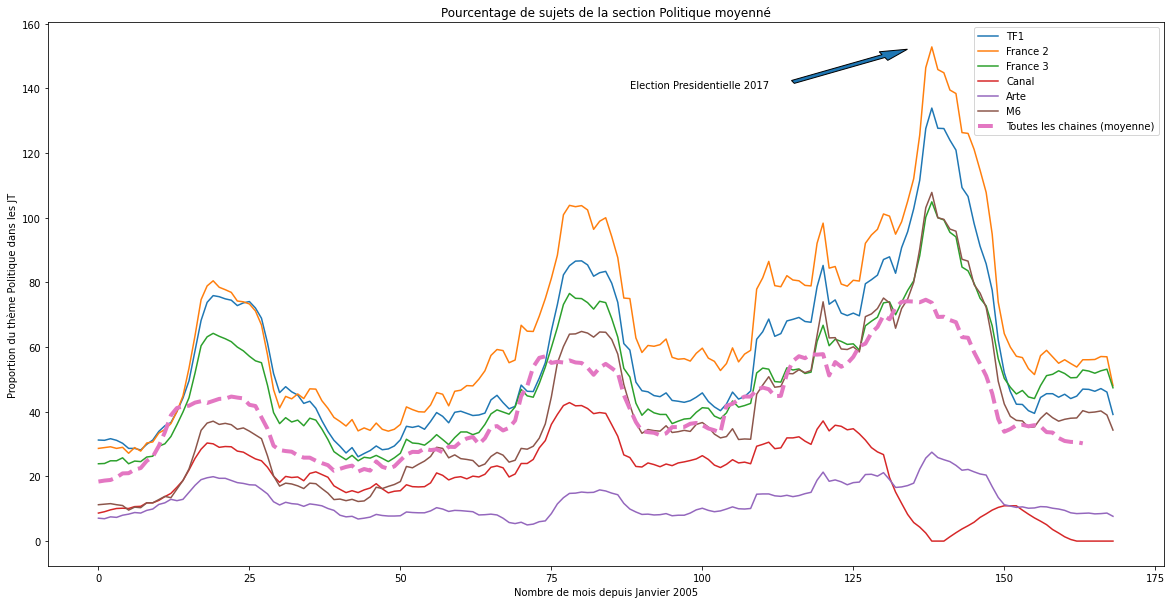

In [7]:
df_theme = df.loc[df['THEMATIQUES'] == 'Politique France']
#Fonction qui sert à faire la moyenne en fonction du temps de debut et de fin pour chaque chaine de television
def moyenne(x, t):
    return np.convolve(x, np.ones(t), 'valid') / t

deb = 0
fin = 180
res = 12

#On transforme nos colonnes pour faciliter leur gestion 
theme1 = df_theme['TF1'].to_numpy()
theme2 = df_theme['France 2'].to_numpy()
theme3 = df_theme['France 3'].to_numpy()
theme4 = df_theme['Canal +'].to_numpy()
theme5 = df_theme['Arte'].to_numpy()
theme6 = df_theme['M6'].to_numpy()

#Nous faisons une moyenne sur le nombre de JT de chaque chaine
total = (theme1 + theme2 + theme3 + theme4 + theme5 + theme6)/6

plt.figure(figsize=(20,10))

#Representer les graphiques 
plt.plot(moyenne(theme1[deb: fin],res), label = 'TF1')
plt.plot(moyenne(theme2[deb: fin],res), label = 'France 2')
plt.plot(moyenne(theme3[deb: fin],res), label = 'France 3')
plt.plot(moyenne(theme4[deb: fin],res), label = 'Canal')
plt.plot(moyenne(theme5[deb: fin],res), label = 'Arte')
plt.plot(moyenne(theme6[deb: fin],res), label = 'M6')
plt.plot(moyenne(total[deb: fin],res + 5), label = 'Toutes les chaines (moyenne)', 
        linewidth=4, linestyle='dashed')

#Petit details pour permettre a nos lecteurs de comprendre le graphique et ce que nous voulons montrer
plt.title('Pourcentage de sujets de la section Politique moyenné')
plt.xlabel('Nombre de mois depuis Janvier 2005')
plt.ylabel('Proportion du thème Politique dans les JT')
plt.arrow(x=115, y=142, dx=15, dy=8, width=1) 
plt.annotate('Election Presidentielle 2017', xy = (88, 140))
plt.legend()
plt.show()

*Petite aparté sur la politique, sujet majeur en cette année d’élection.*

Sur ce graphique nous pouvons voir la proportion du thème politique dans les JT parmi les chaînes en fonction du temps. 
Il est logique de constater que les pics du graphique apparaissent lorsqu'une élection présidentielle a eu lieu. 

De plus, nous pouvons aussi constater qu'au fil du temps, la part de JT sur le thème Politique lorsque des élections présidentielles sont organisées augmente fortement, ce qui valide l’idée précédente sur l’évolution de la partie plus politique des sujets de télévisions. Par exemple la part en pourcentage du thème politique dans les JT entre 2007 et 2017 a augmenté de 70% qui est considérable, donc on peut supposer que les médias ont un rôle essentiel pendant les élections présidentielles et que ce phénomène semble s'intensifier d'année en année.

Maintenant que nous avons vu le sujet de la politique, voyons voir si une répartion des sujets est flagrente.

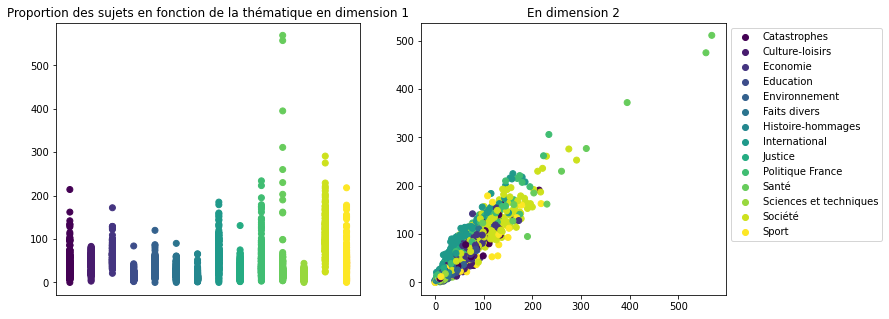

In [8]:
#On fait une copie de notre tableau
df_tmp = df.copy()
#On remplace les noms des colonnes par des chiffres
df_tmp['THEMATIQUES'] = df['THEMATIQUES'].replace(['Catastrophes','Culture-loisirs', 'Economie', 'Education', 'Environnement', 'Faits divers','Histoire-hommages','International', 'Justice', 'Politique France', 'Santé', 'Sciences et techniques','Société','Sport' ],
[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df_tmp = df_tmp.drop(columns=['MOIS', 'Totaux'])
dt = df_tmp

X = dt.values
y = dt.loc[:, 'THEMATIQUES'].values
color = [plt.get_cmap('Spectral')(np.linspace(0, 14))]

target_names = ['Catastrophes','Culture-loisirs', 'Economie', 'Education', 'Environnement', 'Faits divers','Histoire-hommages','International', 'Justice', 'Politique France', 'Santé', 'Sciences et techniques','Société','Sport']
#On affichera deux nuages de points pour voir la répartition des JT sous différente dimension
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Proportion des sujets en fonction de la thématique en dimension 1")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xticks([])
plt.subplot(1, 2, 2)
plt.title("En dimension 2")
scatter = plt.scatter(X[:, 1], X[:, 2], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=target_names,bbox_to_anchor = (1 , 1))



Les disparités des valeurs des thématiques se regroupent dans un même ensemble de points sauf pour la thématique de la santé, lié à la crise sanitaire. Ainsi le nombre de sujet appartiennent à même un intervalle (hormis certaines thématiques).
___
Maintenant, voyons si une chaîne se démarque sur ce qu'elle diffuse. Nous allons utiliser la méthode de l'ACP pour voir cela.

In [9]:
#Fonction ACP
def ACP(X,targets,targets_names,colors,titre):
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    plt.figure()
    for color, i, target_name in zip(colors, np.unique(targets), targets_names):
        plt.scatter(X_r[targets==i,0], X_r[targets==i,1], color = color, label = target_name)
        
    plt.legend(bbox_to_anchor =(1.55, 1), ncol = 2)
    plt.title(titre)    
    plt.show()


In [10]:
#Cette partie permet de voir l'ACP via sa transposé 
df_tmp['THEMATIQUES'] = df['THEMATIQUES'].replace(['Catastrophes','Culture-loisirs', 'Economie', 'Education', 'Environnement', 'Faits divers','Histoire-hommages','International', 'Justice', 'Politique France', 'Santé', 'Sciences et techniques','Société','Sport' ],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df_tmp = df_tmp.drop(columns=['THEMATIQUES'])

df_tmp.columns = ['1', '2', '3', '4', '5', '6']
#On transpose la matrice
dt = df_tmp.transpose()

X1 = dt.values
y1=  np.arange(1, 7, 1).tolist()
target_names_acp = ['TF1','France 2','France 3','Canal +','Arte','M6']

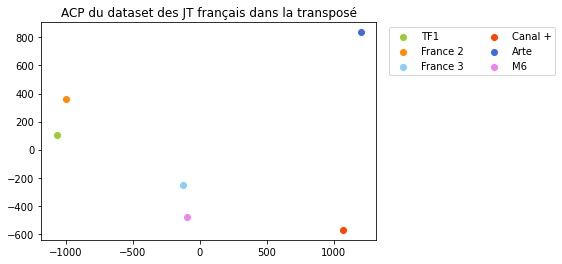

In [11]:
ACP(X1,y1,target_names_acp,couleur,"ACP du dataset des JT français dans la transposé")

L'ACP nous permet de dire que les chaines ont leurs propres spécificités car ils sont très distinguables entre eux sur l'ACP. 

Ainsi on peut conclure que les données sont spécifiques à la chaine.

<AxesSubplot:title={'center':'Les thèmes traités par chaques chaines'}, xlabel='THEMATIQUES'>

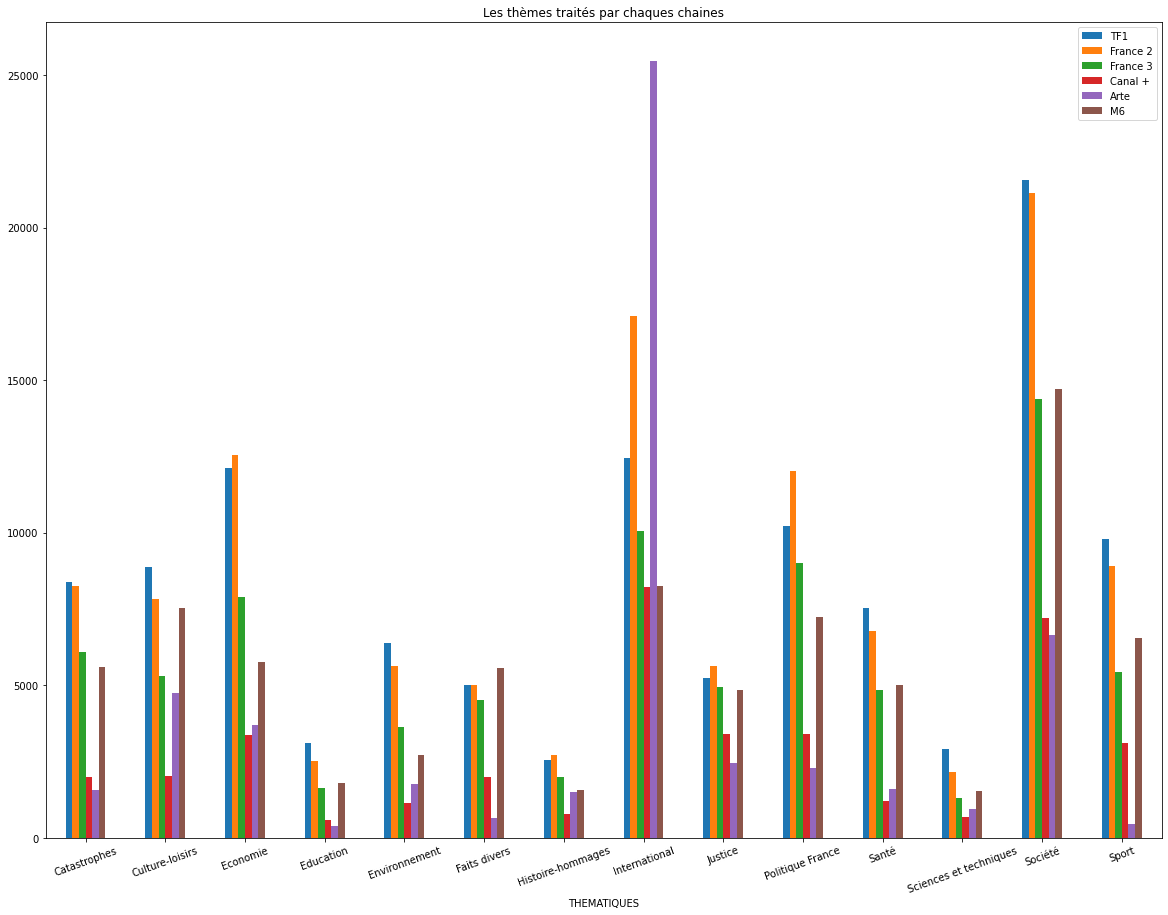

In [12]:
#Ici nous allons faire un tableaux en fonction des thematiques 
# et faire la somme totale du nombre de JT par chaine selon ses thematiques.
dtt = df.groupby('THEMATIQUES').sum()
data4 = dtt.drop(columns = 'Totaux')
data4.plot(kind='bar', rot=20, title="Les thèmes traités par chaques chaines", figsize=(20,15))

Une autre interpretation est fournie juste en dessous avec la heatmap

<AxesSubplot:title={'center':'Nombre de JT totaux des chaines selon les thèmes'}, ylabel='THEMATIQUES'>

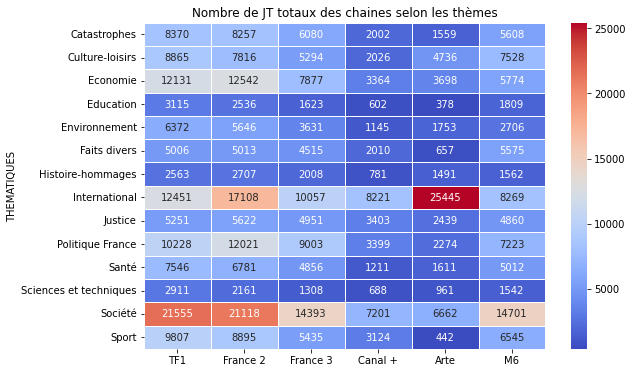

In [13]:
#Comme nous avons deja fais un groupby juste en haut, alors nous allons utiliser l'heatmap pour eclaircir et representer d'une 
# meilleure façon nos données en utilisant la librairie seaborn vu en cour
f,ax=plt.subplots(figsize=(9,6))
ax.set_title('Nombre de JT totaux des chaines selon les thèmes')
sns.heatmap(data4,annot=True,fmt="d",linewidths=.5,ax=ax,cmap="coolwarm")

Ces interprétations nous permettent d’avancer l’idée qu’une chaîne peut se distinguer sur ce qu’elle diffuse.

Tout d’abord TF1 et France 2 sont assez similaire au niveau du nombre de JT (ce qui est logique car la seule différence est que TF1 est privé alors que France 2 est publique) même si France 2 parle un peu de *l'international* comparé à TF1.
France 3 se démarque uniquement avec l'utilisation du domaine de *société*, ce qui n'est pas étonnant vu que France 3 est regardé pour sa proximité (voir toute la panoplie de chaîne régionaux de France 3).
Arte de son côté parle énormément de *l'international* ce qui paraît logique vu son histoire. 
Tant dis que Canal + traite très de peu de l’actualité dans son ensemble.



## <font color='green'> <center> <b> Partie II : Les données a propos du classement des durées </font> </center> </b>


In [14]:
dft = pd.read_csv('ina-barometre-jt-tv-donnees-mensuelles-2005-2020-duree.csv', sep = ';', encoding='latin-1')
dft.head()

,MOIS,THEMATIQUES,TF1,France 2,France 3,Canal +,Arte,M6,Totaux
0,janv-05,Catastrophes,05:39:50,05:13:56,02:35:01,00:22:41,00:51:51,01:07:28,15:50:47
1,janv-05,Culture-loisirs,00:50:22,01:24:04,01:12:27,00:04:12,00:00:00,00:27:44,03:58:49
2,janv-05,Economie,00:52:25,00:31:12,00:16:39,00:01:59,00:07:59,00:11:04,02:01:18
3,janv-05,Education,00:22:00,00:20:42,00:09:46,00:02:18,00:04:35,00:13:10,01:12:31
4,janv-05,Environnement,00:45:00,00:32:55,00:23:09,00:00:41,00:02:16,00:09:46,01:53:47


Nous pouvons voir que les données dans le fichier "ina-barometre-jt-tv-donnees-mensuelles-2005-2020-duree" sont composés de :
 - Une colonne **MOIS** qui va de janvier 2005 - septembre 2020 et de janvier 2021 à mars 2021
 - Une colonne **THEMATIQUES** qui est composée des valeurs suivantes: 'Catastrophes','Culture-loisirs', 'Economie', 'Education', 'Environnement', 'Faits divers',		   'Histoire-hommages','International', 'Justice', 'Politique France', 'Santé', 'Sciences et techniques','Société','Sport' 
 - De six colonnes correspondants aux nombres heure diffusé en fonction de la thématiques sur **les 6 chaînes nationales** (TF1, France 2, ...)
 - D'une colonne **Totaux** qui est la somme des heures diffusé par les chaînes.

In [15]:
#convertion des données du format heure en float
tmp = dft.loc[:,["TF1","France 2","France 3","Canal +","Arte","M6","Totaux"]]
s = tmp.squeeze()

durTf1 = pd.to_timedelta(s["TF1"]) / pd.offsets.Minute(1)

durF2 = pd.to_timedelta(s["France 2"]) / pd.offsets.Minute(1)

durF3 = pd.to_timedelta(s["France 3"]) / pd.offsets.Minute(1)

durCanal = pd.to_timedelta(s["Canal +"]) / pd.offsets.Minute(1)

durArte = pd.to_timedelta(s["Arte"]) / pd.offsets.Minute(1)

durM6 = pd.to_timedelta(s["M6"]) / pd.offsets.Minute(1)

durTotaux = pd.to_timedelta(s["Totaux"]) / pd.offsets.Minute(1)

new_df = {"TF1": durTf1, "France 2": durF2, "France 3": durF3, "Canal +": durCanal, "Arte":durArte, "M6": durM6,"Totaux":durTotaux}

new_dft = pd.DataFrame(new_df)
new_dft = new_dft.round()
new_dft = new_dft.astype({"TF1": 'int', "France 2": 'int', "France 3": 'int', "Canal +": 'int', 
							"Arte": 'int', "M6": 'int', "Totaux": 'int'})


dft = dft.loc[:,["MOIS","THEMATIQUES"]].join(new_dft)
dft = dft.drop( ["Totaux"],axis =1)


# création d'un dataframe pour chaque chaine  
c1 = dft.loc[:,["MOIS","THEMATIQUES","TF1"]] 
c1["Chaine"] ="TF1"
c1.columns.values[2] = "Duree"

c2 = dft.loc[:,["MOIS","THEMATIQUES","France 2"]] 
c2["Chaine"] ="France 2"
c2.columns.values[2] = "Duree"

c3 = dft.loc[:,["MOIS","THEMATIQUES","France 3"]] 
c3["Chaine"] ="France 3"
c3.columns.values[2] = "Duree"

c4 = dft.loc[:,["MOIS","THEMATIQUES","Canal +"]] 
c4["Chaine"] ="Canal +"
c4.columns.values[2] = "Duree"

c5 = dft.loc[:,["MOIS","THEMATIQUES","Arte"]] 
c5["Chaine"] ="Arte"
c5.columns.values[2] = "Duree"

c6 = dft.loc[:,["MOIS","THEMATIQUES","M6"]] 
c6["Chaine"] ="M6"
c6.columns.values[2] = "Duree"

#concatenation des tableaux pour réunir toute les chaines dans un même dataframe
duree = pd.concat([c1,c2,c3,c4,c5,c6])
duree = duree.reset_index(drop=True)

<AxesSubplot:title={'center':"Nombres d'heures par thèmedepuis 2005 jusqu'à mars 2021"}, xlabel='THEMATIQUES'>

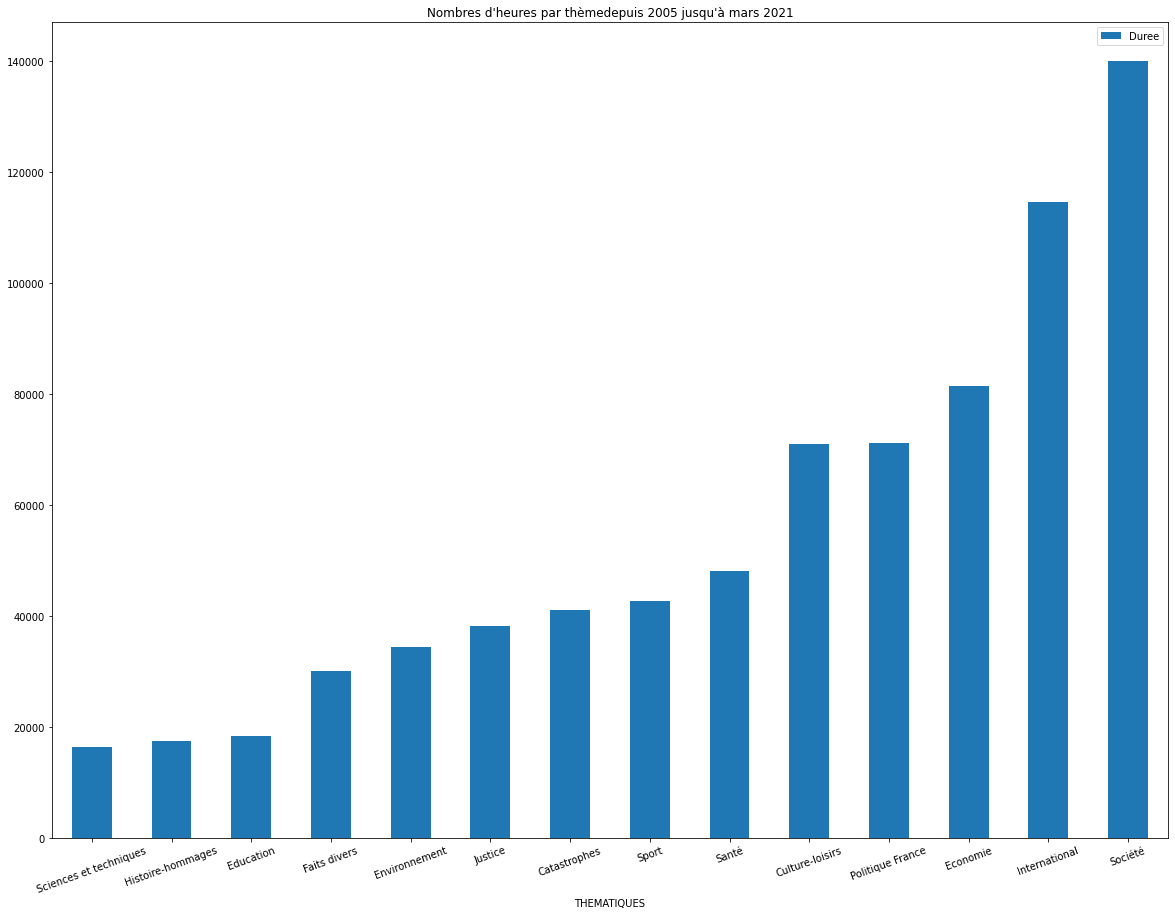

In [16]:
#on regroupe par chaine et on additionne les durees totales
themes = duree.groupby('THEMATIQUES').sum() 
themes.sort_values(by='Duree', inplace=True)

themes.plot(kind='bar', rot=20 ,title="Nombres d'heures par thème" 
			"depuis 2005 jusqu'à mars 2021", figsize=(20,15)) 

On peut remarquer sur l'histogramme que les 5 premiers thèmes les plus diffusés sont :
*Société, International, Economie, Politique France, Culture-loisirs.*
    
Il est surprenant de voir que *Culture-loisirs* aussi haut alors que le nombre de JT en *Culture-loisirs* est parmis les derniers comme les thèmes *Sport* ou *Catastrophe*. 

Ainsi les sujets les plus diffusés ne sont pas forcément ceux ayant le plus de nombre de JT. Cela doit s'expliquer du fait que pour difuser un sujet sur la culture celui-ci doit être plus long.

<AxesSubplot:title={'center':'Durée totales de diffusion des chaines selon les thèmes'}, ylabel='THEMATIQUES'>

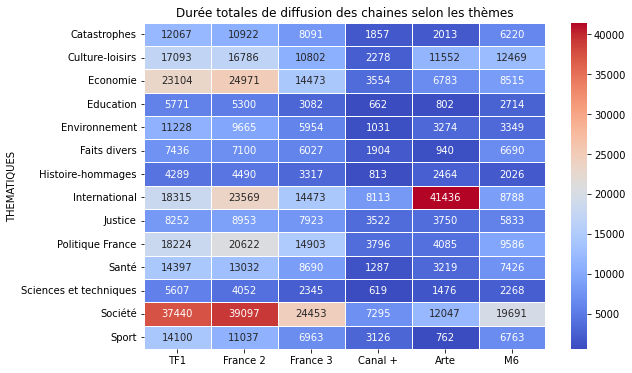

In [17]:
themes = dft.groupby('THEMATIQUES').sum() 
f,ax=plt.subplots(figsize=(9,6))
ax.set_title('Durée totales de diffusion des chaines selon les thèmes')
sns.heatmap(themes,annot=True,fmt="d",linewidths=.5,ax=ax,cmap="coolwarm")

Nous avons fait ce heatmap pour mettre en avant le temps de diffusion des chaînes selon les thématiques.

La première chose qu'on peut remarquer c'est que les répartitions des couleurs qui représentent le temps de diffusion sont très proche du heatmap sur le nombre total de JT en fonction des chaînes et des thématiques. On peut supposer que le temps de diffusion d'un JT est équivalent pour chaque chaîne. Il n'y a pas de chaine qui diffuse peu de JT mais on une durée à l'écran des longues.

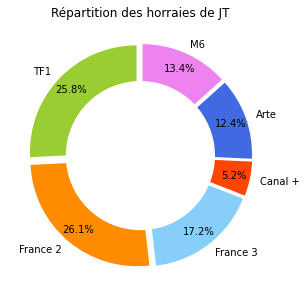

In [19]:
duree2 = duree.groupby('Chaine',sort=False).sum()
duree2.values.flatten()
# duree2.plot(kind='bar', rot=20 ,title="Nombres d'heures diffusées par les chaines depuis 2005 jusqu'à mars 2021", figsize=(20,15))
#explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(duree2.values.flatten(), colors = couleur , labels= ["TF1", "France 2", "France 3", "Canal +", "Arte", "M6"]
		, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.tight_layout()
plt.title('Répartition des horraies de JT')
plt.show()

## <font color='green'> <center> <b> Conclusion </font> </center> </b>

Certaines chaines de télévisions se diversifient dans leur revue de l'actualité comme par exemple Arte et Canal +. 

« Les chaines principales » ont leurs nombres de JT selon les thématiques assez proches, on pourrait même dire qu'ils diffusent le même contenu d’après nos résultats. 
TF1 et France 2 semble diffuser un contenu similaire surtout au niveau des sujets de société et d’économie, à contrario d’Arte qui se distingue, puisqu’elle ne cible pas la même audience (Arte diffuse majoritairement des JT sur la thématique de l'international). 

On peut conclure que les JT des chaines de télévisions se distinguent bien par ce qu'elle diffuse.
